In [38]:
from pandas import read_csv
from os import chdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/concrete.csv"
dataset=read_csv(path)
dataset.head()
print(dataset.shape)
print(dataset.head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1030, 9)
    cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3  

In [39]:
# Divizarea setului de date în set de antrenare și set de test
dataset_train = dataset[0:773]
dataset_test = dataset[773:1030]

train_features = dataset_train.copy()
test_features = dataset_test.copy()

#train_features = train_features.drop(columns=['water'])
#test_features = test_features.drop(columns=['water'])

train_labels = train_features.pop('strength')
test_labels = test_features.pop('strength')

In [40]:
# Normalizarea datelor folosind StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)
train_features_normalized = scaler.transform(train_features)
test_features_normalized = scaler.transform(test_features)

In [41]:
# Inițializarea și antrenarea modelului Lasso
lasso_model = Lasso(alpha=0)  # Ajustează alpha după nevoie
lasso_model.fit(train_features_normalized, train_labels)

<ipython-input-41-8c15c30a1df9>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(train_features_normalized, train_labels)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.047e+04, tolerance: 2.194e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [42]:
# Evaluează performanța modelului pe setul de test
test_score = lasso_model.score(test_features_normalized, test_labels)
print(f'Score on test set: {test_score}')

Score on test set: 0.5568959929643272


In [43]:
# Realizează predicții pe setul de test
lasso_predictions = lasso_model.predict(test_features_normalized)

In [44]:
# Vizualizare coeficienți (dacă dorești)
print('Lasso coefficients:', lasso_model.coef_)

Lasso coefficients: [12.32637139  8.34511624  5.15821216 -3.83812329  1.46012276  0.44082838
  0.76309911  7.16633127]


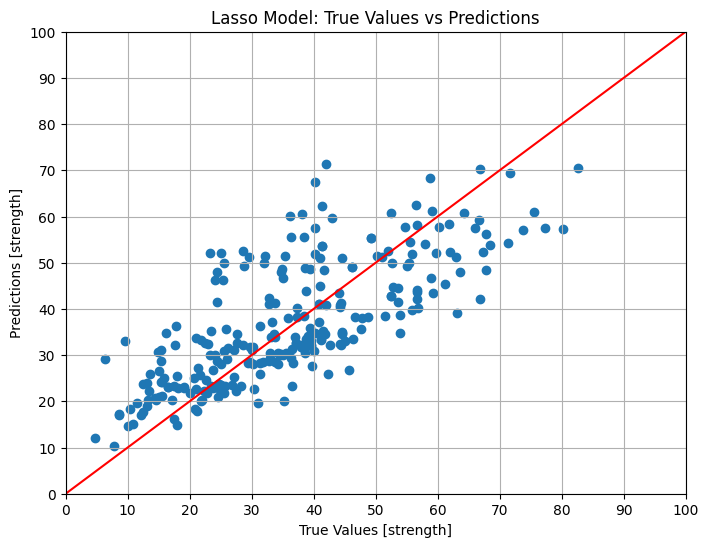

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, lasso_predictions)
plt.xlabel('True Values [strength]')
plt.ylabel('Predictions [strength]')
plt.title('Lasso Model: True Values vs Predictions')
plt.xticks(np.arange(0, 101, 10))  # Setarea marcajelor pe axa x
plt.yticks(np.arange(0, 101, 10))  # Setarea marcajelor pe axa y
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot([0, 100], [0, 100], color='red')  # Linia de 45 de grade pentru referință
plt.grid(True)
plt.show()

Score on test set: 0.5568959929643272
Mean Absolute Error (MAE): 8.622438422348255
Lasso coefficients: [12.32637139  8.34511624  5.15821216 -3.83812329  1.46012276  0.44082838
  0.76309911  7.16633127]


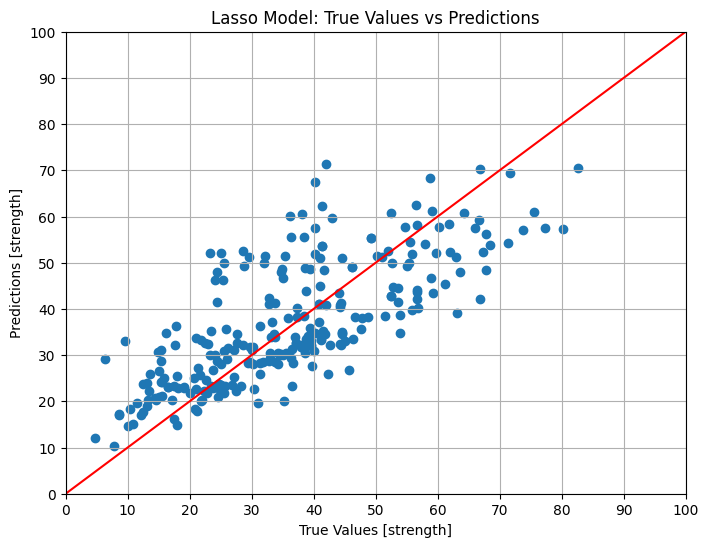

In [46]:
test_score = lasso_model.score(test_features_normalized, test_labels)
print(f'Score on test set: {test_score}')

# Realizează predicții pe setul de test
lasso_predictions = lasso_model.predict(test_features_normalized)

# Calculează Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, lasso_predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Vizualizare coeficienți (dacă dorești)
print('Lasso coefficients:', lasso_model.coef_)

plt.figure(figsize=(8, 6))
plt.scatter(test_labels, lasso_predictions)
plt.xlabel('True Values [strength]')
plt.ylabel('Predictions [strength]')
plt.title('Lasso Model: True Values vs Predictions')
plt.xticks(np.arange(0, 101, 10))  # Setarea marcajelor pe axa x
plt.yticks(np.arange(0, 101, 10))  # Setarea marcajelor pe axa y
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot([0, 100], [0, 100], color='red')  # Linia de 45 de grade pentru referință
plt.grid(True)
plt.show()